# HW1 Immitation Learning Solution
## 1.2 Behavior Cloning

Behavior cloning results table shown below. Each run result is using the following params:
* Training data: `train_batch_size:100`, `num_agent_train_steps_per_iter:1000`
* Neural net: 2 hidden layers, 64 neurons per layer
* Eval data: `eval_batch_size:10,000`, `ep_len:1000` (thus 10 paths with 1000 timesteps each for eval)

**Performance**

Note that `Return` indicates total reward accumulated over path, and 10 eval paths are generated for each BC policy.

| Environment | Expert Return | BC Policy Mean Return | BC Policy Std Return | % Expert Performance |
| :---: | :---: | :---: | :---: | :---: |
| **Ant-v2** | 4713.65 | 4773.50 | 66.22 | 101.3% |
| **HalfCheetah-v2** | 4205.77 | 3660.92 | 1302.87 | 87.0% |
| **Humanoid-v2** | 10,344.51 | 241.36 | 92.52 | 2.3% |

**Videos**

| Environment | Expert Policy | BC Policy|
| :---: | :---: | :---: |
| **Ant-v2** | <img src="ant-expert.gif" width="200"/> | <img src="ant-bc-eval.gif" width="200"/> |
| **HalfCheetah-v2** | <img src="halfCheetah-expert.gif" width="200"/> | <img src="halfCheetah-bc-eval.gif" width="200"/> |
| **Humanoid-v2** | <img src="humanoid-expert.gif" width="200"/> | <img src="humanoid-bc-eval.gif" width="200"/> |

**Commands to Generate:**

Ant:<br>
```--expert_policy_file cs285/policies/experts/Ant.pkl --env_name Ant-v2 --exp_name bc_ant --n_iter 1 --expert_data cs285/expert_data/expert_data_Ant-v2.pkl -ngpu --ep_len_video 200 --eval_batch_size 10000```

HalfCheetah:<br>
```--expert_policy_file cs285/policies/experts/HalfCheetah.pkl --env_name HalfCheetah-v2 --exp_name bc_HalfCheetah --n_iter 1 --expert_data cs285/expert_data/expert_data_HalfCheetah-v2.pkl -ngpu --ep_len_video 200 --eval_batch_size 10000```

Humanoid:<br>
```--expert_policy_file cs285/policies/experts/Humanoid.pkl --env_name Humanoid-v2 --exp_name bc_humanoid --n_iter 1 --expert_data cs285/expert_data/expert_data_Humanoid-v2.pkl -ngpu --ep_len_video 200 --eval_batch_size 10000```


## 1.3 HyperParam Tuning

Below plot shows effect of tuning `train_batch_size` (number of training transitions randomly sampled from replay buffer per gradient descent step) on policy return. Increasing the this batch size will reduce the stochasticity of each gradient descent step and should help more smoothly converge to the neural net local min.

<IPython.core.display.Javascript object>


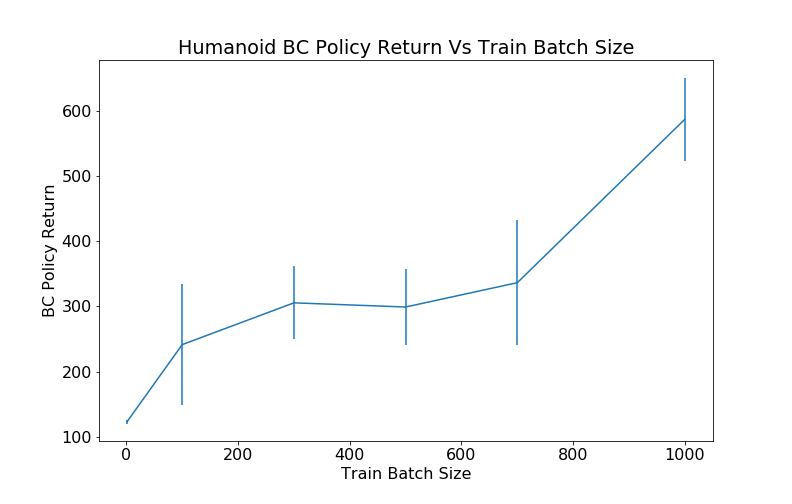

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
plt.rcParams['figure.figsize'] = [11, 7]
plt.rcParams.update({'font.size': 16})

bc_avg_return = [122.81, 241.36, 305.4, 299.01, 336.32, 586.93]
bc_std_return = [2.71, 92.52, 56.13, 58.03, 95.85, 63.53]
train_batch_size = [1, 100, 300, 500, 700, 1000]
plt.errorbar(train_batch_size, bc_avg_return, yerr=bc_std_return)
plt.ylabel("BC Policy Return")
plt.xlabel("Train Batch Size")
plt.title("Humanoid BC Policy Return Vs Train Batch Size");

| Environment | batch:100 | batch:1000 |
| :---: | :---: | :---: |
| **HalfCheetah-v2** | <img src="humanoid-bc-eval.gif" width="200"/> | <img src="humanoid-bc-eval-1000-train-batch.gif" width="200"/> |

## 2. DAgger

Results below use `n_iter:10` outerloop DAgger iterations with the same parameters used in section **1.2** above.

| Environment | Avg Return | Std Dev| Notes |
| :---: | :---: | :---: | :--- |
| **Ant-v2** | <img src="AntDAggerAvgReturn.png" width="300"/> | <img src="AntDAggerStd.png" width="300"/> | Performance already starts by matching expert |
| **HalfCheetah-v2** | <img src="HalfCheetahDAggerAvgReturn.png" width="300"/> | <img src="HalfCheetahDAggerStd.png" width="300"/> | Performance quickly converges to expert level after 2nd iteration |
| **Humanoid-v2** | <img src="humanoid-DAgger-avg-return.png" width="300"/> | <img src="humanoid-DAgger-std.png" width="300"/> | Consistently converging over 20 iters (using `train_batch_size:500`) |


Gifs below show convergence of Humanoid Policy via DAgger:

| Environment | Itr 1 | Itr 5 | Itr 15 |
| :---: | :---: | :---: | :--- |
| **Humanoid-v2** | <img src="humanoid-bc-eval.gif" width="300"/> | <img src="humanoid-bc-eval-itr-05.gif" width="300"/> | <img src="humanoid-bc-eval-itr-15.gif" width="300"/> |